# Análise dos dados etiquetados

In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

import time

## Funções úteis

In [2]:
from funcoes_uteis import remover_stopwords \
    , gerar_cloud, create_stemm_from_articles \
    , extract_words_from_list_of_articles \
    , plot_frequencia_tokens \
    , criar_tf_idf

In [3]:
df_articles = pd.read_csv('labeled_articles.csv', sep='\t')

In [4]:
df_articles.head()

,date,text,indice,score
0,2015-01-02,primeiro discurso presidente camara deputados ...,0,0.060688
1,2015-01-05,presidente nacional psdb senador aecio neves m...,0,0.148923
2,2015-01-06,acao reduz poderes palacio planalto presidente...,0,0.140354
3,2015-01-07,petrobras anunciou noite desta quartafeira ven...,0,0.061779
4,2015-01-08,policia federal indiciou sextafeira exdiretor ...,0,0.028722


### Datas estão entre

In [5]:
df_articles.date.min(), df_articles.date.max()

('2015-01-02', '2017-09-29')

In [6]:
df_articles_total = df_articles
df_articles = df_articles[df_articles.date < '2022-01-01']
df_articles_tests = df_articles[df_articles.date >= '2022-01-01']

## Separa artigos que influenciam positivamente, negativamente e não influenciam

In [7]:
articles_positive_influence = df_articles[df_articles.indice == 1].text.tolist()
articles_no_influence = df_articles[df_articles.indice == 0].text.tolist()
articles_negative_influence = df_articles[df_articles.indice == -1].text.tolist()

## Remove stopwords e cria clouds

In [8]:
%%time
documents_without_stopwords = [remover_stopwords(text) for text in df_articles.text.tolist()]
positive_documents_without_stopwords = [remover_stopwords(text) for text in articles_positive_influence]
negative_documents_without_stopwords = [remover_stopwords(text) for text in articles_negative_influence]
neutral_documents_without_stopwords = [remover_stopwords(text) for text in articles_no_influence]

CPU times: total: 14.4 s
Wall time: 14.6 s


In [9]:
print(f'Total de artigos: {len(documents_without_stopwords)}')
print(f'Total de artigos positivos: {len(positive_documents_without_stopwords)}')
print(f'Total de artigos negativos: {len(negative_documents_without_stopwords)}')
print(f'Total de artigos neutros: {len(neutral_documents_without_stopwords)}')

Total de artigos: 665
Total de artigos positivos: 101
Total de artigos negativos: 80
Total de artigos neutros: 484


Todas as palavras


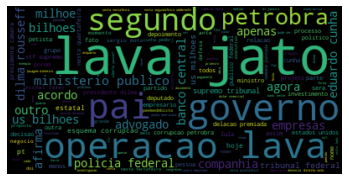

In [10]:
gerar_cloud(' '.join(documents_without_stopwords), title="Todas as palavras")

Artigos positivos


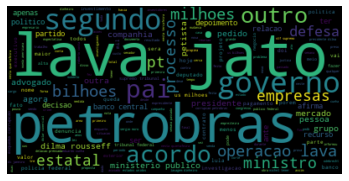

In [11]:
gerar_cloud(' '.join(positive_documents_without_stopwords), title="Artigos positivos")

Artigos negativos


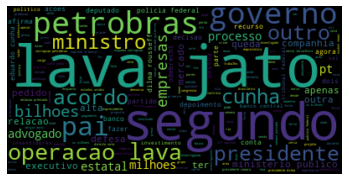

In [12]:
gerar_cloud(' '.join(negative_documents_without_stopwords), title="Artigos negativos")

Artigos sem influência (neutros)


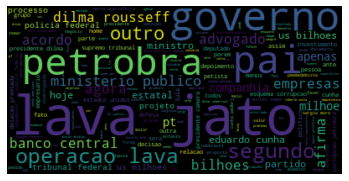

In [13]:
gerar_cloud(' '.join(neutral_documents_without_stopwords), title="Artigos sem influência (neutros)")

## Stemm

In [14]:
%%time
stemmed_all_articles = create_stemm_from_articles(documents_without_stopwords)
stemmed_positive_articles = create_stemm_from_articles(positive_documents_without_stopwords)
stemmed_negative_articles = create_stemm_from_articles(negative_documents_without_stopwords)
stemmed_neutral_articles = create_stemm_from_articles(neutral_documents_without_stopwords)

665/665: estimado 0.0 mins para terminarr
end...
101/101: estimado 0.0 mins para terminar
end...
80/80: estimado 0.0 mins para terminar
end...
484/484: estimado 0.0 mins para terminarr
end...
CPU times: total: 49min 33s
Wall time: 50min 29s


In [15]:
%%time

raw_all_words = extract_words_from_list_of_articles(documents_without_stopwords)
raw_positive_words = extract_words_from_list_of_articles(positive_documents_without_stopwords)
raw_negative_words = extract_words_from_list_of_articles(negative_documents_without_stopwords)
raw_neutral_words = extract_words_from_list_of_articles(neutral_documents_without_stopwords)

CPU times: total: 844 ms.0 mins para terminar
Wall time: 927 ms


In [16]:
%%time
stemmed_all_words = extract_words_from_list_of_articles(stemmed_all_articles)
stemmed_positive_words = extract_words_from_list_of_articles(stemmed_positive_articles)
stemmed_negative_words = extract_words_from_list_of_articles(stemmed_negative_articles)
stemmed_neutral_words = extract_words_from_list_of_articles(stemmed_neutral_articles)

CPU times: total: 781 ms.0 mins para terminar
Wall time: 850 ms


In [17]:
df_stemm_labeled = pd.DataFrame({'key' : stemmed_all_words, 'word' : raw_all_words, 'stemm' : stemmed_all_words, }, index=stemmed_all_words)
df_stemm_labeled = df_stemm_labeled.drop_duplicates()
df_stemm_labeled = df_stemm_labeled.groupby('key').word.transform(lambda x: ', '.join(x))
df_stemm_labeled = pd.DataFrame(df_stemm_labeled, index=df_stemm_labeled.index)
df_stemm_labeled.to_csv('tfidf/df_stemm_labeled.csv', sep='\t')
df_stemm_labeled.shape[0]

53942

Todas as palavras


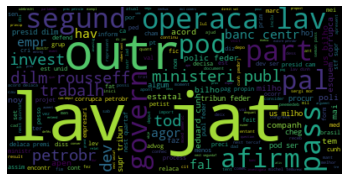

CPU times: total: 13.6 s
Wall time: 14.1 s


In [18]:
%%time
gerar_cloud(stemmed_all_words, "Todas as palavras")

Palavras positivas


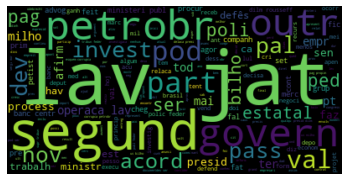

CPU times: total: 2.53 s
Wall time: 2.65 s


In [19]:
%%time
gerar_cloud(stemmed_positive_words, "Palavras positivas")

Palavras negativas


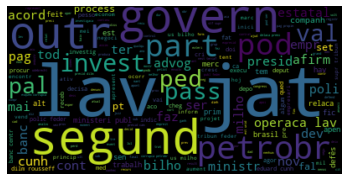

CPU times: total: 2.09 s
Wall time: 2.21 s


In [20]:
%%time
gerar_cloud(stemmed_negative_words, "Palavras negativas")

Palavras sem efeito (neutras)


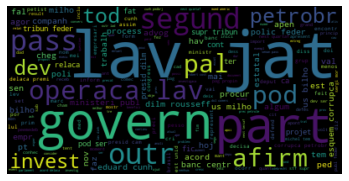

CPU times: total: 9.62 s
Wall time: 10 s


In [21]:
%%time
gerar_cloud(stemmed_neutral_words, "Palavras sem efeito (neutras)")

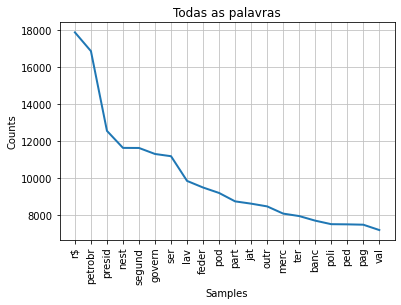

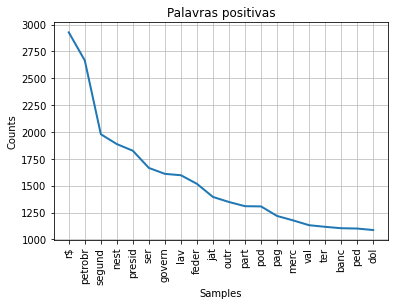

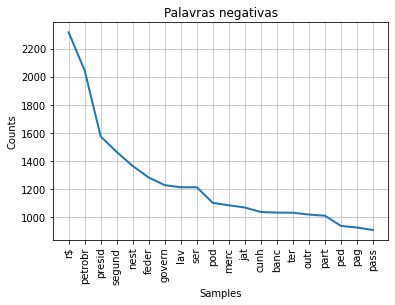

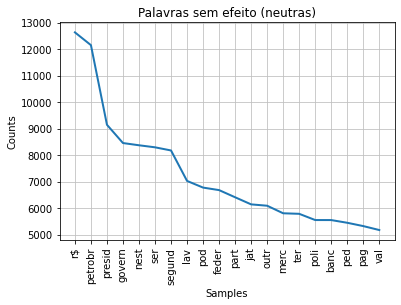

CPU times: total: 3.16 s
Wall time: 3.37 s


In [22]:
%%time
plot_frequencia_tokens(stemmed_all_words, title="Todas as palavras")
plot_frequencia_tokens(stemmed_positive_words, title="Palavras positivas")
plot_frequencia_tokens(stemmed_negative_words, title="Palavras negativas")
plot_frequencia_tokens(stemmed_neutral_words, title="Palavras sem efeito (neutras)")

## Td Idf

In [23]:
%%time
tf_idf_all_words = criar_tf_idf([' '.join(article) for article in stemmed_all_articles], min_df=0.01)
len(tf_idf_all_words)

d:\Estudos\ML\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


CPU times: total: 9.45 s
Wall time: 10.1 s


665

In [24]:
%%time
tf_idf_positives_words = criar_tf_idf([' '.join(article) for article in stemmed_positive_articles], min_df=0.01)
len(tf_idf_positives_words)

CPU times: total: 1.86 s
Wall time: 1.93 s


d:\Estudos\ML\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


101

In [25]:
%%time
tf_idf_negative_words = criar_tf_idf([' '.join(article) for article in stemmed_negative_articles], min_df=0.01)
len(tf_idf_negative_words)

d:\Estudos\ML\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


CPU times: total: 3.05 s
Wall time: 3.33 s


80

In [26]:
%%time
tf_idf_neutral_words = criar_tf_idf([' '.join(article) for article in stemmed_neutral_articles], min_df=0.01)
len(tf_idf_neutral_words)

CPU times: total: 8.95 s
Wall time: 9.47 s


d:\Estudos\ML\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


484

In [27]:
tf_idf_all_words.max().index

Index(['ab', 'ab inbev', 'abaf', 'abaix', 'abaix bilho', 'abaix centr',
       'abaix dol', 'abaix esper', 'abaix estim', 'abaix expect',
       ...
       'zon nort rio', 'zon oest', 'zon oest rio', 'zon sul', 'zon sul rio',
       'zonil', 'zuriqu', 'zwi', 'zwi skornick', 'zyml'],
      dtype='object', length=57774)

In [28]:
%%time
df_tf_idf_max_all = pd.DataFrame({'names' : tf_idf_all_words.max().index, 'values' : tf_idf_all_words.max().tolist()}, index=tf_idf_all_words.max().index)
df_tf_idf_max_positive = pd.DataFrame({'names' : tf_idf_positives_words.max().index, 'values' : tf_idf_positives_words.max().tolist()}, index=tf_idf_positives_words.max().index)
df_tf_idf_max_negative = pd.DataFrame({'names' : tf_idf_negative_words.max().index, 'values' : tf_idf_negative_words.max().tolist()}, index=tf_idf_negative_words.max().index)
df_tf_idf_max_neutral = pd.DataFrame({'names' : tf_idf_neutral_words.max().index, 'values' : tf_idf_neutral_words.max().tolist()}, index=tf_idf_neutral_words.max().index)


CPU times: total: 1.41 s
Wall time: 1.45 s


In [29]:
len(df_tf_idf_max_all), len(df_tf_idf_max_positive), len(df_tf_idf_max_negative), len(df_tf_idf_max_neutral)

(57774, 58740, 388612, 63797)

In [30]:
df_tf_idf_max_neutral = pd.concat([df_tf_idf_max_neutral.drop_duplicates(), df_stemm_labeled.drop_duplicates()], axis=1)
df_tf_idf_max_negative = pd.concat([df_tf_idf_max_negative.drop_duplicates(), df_stemm_labeled.drop_duplicates()], axis=1)
df_tf_idf_max_positive = pd.concat([df_tf_idf_max_positive.drop_duplicates(), df_stemm_labeled.drop_duplicates()], axis=1)
df_tf_idf_max_all = pd.concat([df_tf_idf_max_all.drop_duplicates(), df_stemm_labeled.drop_duplicates()], axis=1)

In [31]:
%%time
df_tf_idf_max_all.sort_values(by=['values'], ascending=False).to_csv('tfidf/df_tf_idf_max_all.csv', sep = '\t')

CPU times: total: 266 ms
Wall time: 272 ms


In [32]:
%%time
df_tf_idf_max_positive.sort_values(by=['values'], ascending=False).to_csv('tfidf/df_tf_idf_max_positive.csv', sep = '\t')

CPU times: total: 250 ms
Wall time: 461 ms


In [33]:
%%time
df_tf_idf_max_negative.sort_values(by=['values'], ascending=False).to_csv('tfidf/df_tf_idf_max_negative.csv', sep = '\t')

CPU times: total: 1.3 s
Wall time: 1.39 s


In [34]:
%%time
df_tf_idf_max_neutral.sort_values(by=['values'], ascending=False).to_csv('tfidf/df_tf_idf_max_neutral.csv', sep = '\t')

CPU times: total: 312 ms
Wall time: 301 ms


In [35]:
df_tf_idf_max_all

,names,values,word
ab,ab,0.083548,"ab, abs, abem"
ab inbev,ab inbev,0.093714,NaN
abaf,abaf,0.036420,"abafa, abafar, abafou, abafada, abafamento"
abaix,abaix,0.047331,"abaixo, abaixamos, abaixar, abaixa"
abaix bilho,abaix bilho,0.032165,NaN
...,...,...,...
inquilinat,NaN,NaN,inquilinato
frischtak,NaN,NaN,frischtak
zoffmann,NaN,NaN,zoffmann
brandin,NaN,NaN,brandini
